In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [66]:
df = pd.read_csv('Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [71]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [72]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [73]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [75]:
x_train.shape

(105, 4)

In [76]:
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [77]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [79]:
model = Sequential()
model.add(Input(shape=(x_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [80]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - 317ms/step - accuracy: 0.2476 - loss: 1.2522
Epoch 2/100
4/4 - 0s - 13ms/step - accuracy: 0.3524 - loss: 1.1518
Epoch 3/100
4/4 - 0s - 11ms/step - accuracy: 0.3429 - loss: 1.0649
Epoch 4/100
4/4 - 0s - 11ms/step - accuracy: 0.4571 - loss: 1.0665
Epoch 5/100
4/4 - 0s - 12ms/step - accuracy: 0.4952 - loss: 1.0378
Epoch 6/100
4/4 - 0s - 12ms/step - accuracy: 0.4857 - loss: 0.9653
Epoch 7/100
4/4 - 0s - 12ms/step - accuracy: 0.5714 - loss: 0.9487
Epoch 8/100
4/4 - 0s - 12ms/step - accuracy: 0.5429 - loss: 0.9010
Epoch 9/100
4/4 - 0s - 10ms/step - accuracy: 0.6381 - loss: 0.8388
Epoch 10/100
4/4 - 0s - 11ms/step - accuracy: 0.6857 - loss: 0.8465
Epoch 11/100
4/4 - 0s - 10ms/step - accuracy: 0.7048 - loss: 0.7839
Epoch 12/100
4/4 - 0s - 10ms/step - accuracy: 0.7143 - loss: 0.7365
Epoch 13/100
4/4 - 0s - 11ms/step - accuracy: 0.6952 - loss: 0.6757
Epoch 14/100
4/4 - 0s - 10ms/step - accuracy: 0.7238 - loss: 0.7382
Epoch 15/100
4/4 - 0s - 10ms/step - accuracy: 0.7524 - l

In [82]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[9.9986529e-01 6.8737027e-05 6.5909058e-05]
 [2.0478731e-02 7.6366627e-01 2.1585502e-01]
 [9.9900585e-01 5.9985864e-04 3.9431392e-04]
 [1.8095336e-04 4.1124627e-02 9.5869446e-01]
 [9.9875617e-01 7.3152245e-04 5.1228266e-04]]


In [83]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [84]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [86]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'Actual')

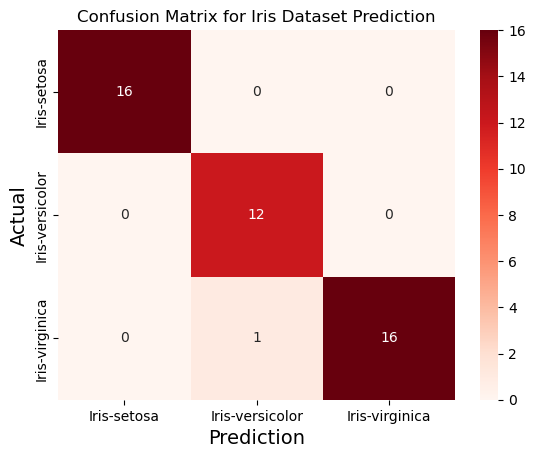

In [89]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('Confusion Matrix for Iris Dataset Prediction')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)